In [1]:
from UTILITY_quickstart import *

importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch.yml")


#Optionally override
importedDefaultSettings = importedDefaultSettings | {
    #"L1PhaseSet" : -22.1126373302,
    "L2PhaseSet" : -33.0, #Pencil beam



    ##defaults.yml settings: 
    # "S1ELkG" :  804.871,
    # "S2ELkG" :  -2049.489,
    # "S3ELkG" :  -1019.3230,
    # "S3ERkG" :  -1019.3230,
    # "S2ERkG" :  -2049.489 ,
    # "S1ERkG" :  804.871,
    # "S1EL_xOffset" : 0.0,
    # "S1EL_yOffset" : 0.0,
    # "S2EL_xOffset" : 0.0,
    # "S2EL_yOffset" : 0.0,
    # "S2ER_xOffset" : 0.0,
    # "S2ER_yOffset" : 0.0,
    # "S1ER_xOffset" : 0.0,
    # "S1ER_yOffset" : 0.0,
}


csrTF = True
inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0


Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Also setting BC14 energy = 4.5 GeV, from 4.422824229187161 GeV
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Also setting BC20 energy = 10.0 GeV, from 9.915310514402394 GeV
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Set track_end = MFFF
Tracking!
Beam centered at MFFF written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = MFFF, track_end = end
Tracking!
trackBeam() exiting


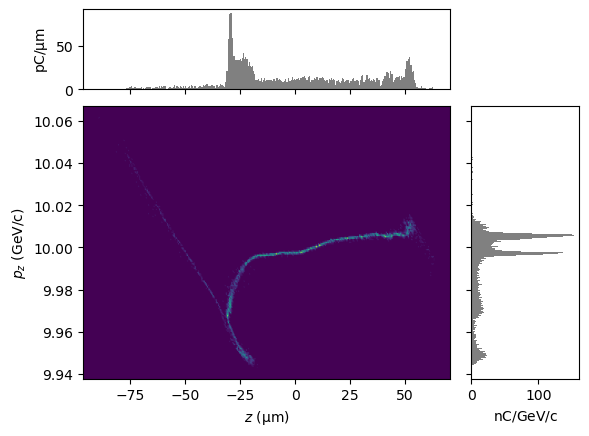

{'PDrive_median_x': -2.618956624712382e-06,
 'PDrive_median_y': -2.278716109211004e-07,
 'PDrive_median_xp': -3.746792502322741e-07,
 'PDrive_median_yp': 2.7052993066369874e-07,
 'PDrive_sigmaSI90_x': 4.590751018662783e-05,
 'PDrive_sigmaSI90_y': 1.0393987811323748e-05,
 'PDrive_sigmaSI90_z': 2.6086867218922735e-05,
 'PDrive_sigmaSI90_xp': 6.572427913752636e-05,
 'PDrive_sigmaSI90_yp': 1.5816156608002363e-05,
 'PDrive_emitSI90_x': 2.433564599700873e-05,
 'PDrive_emitSI90_y': 2.805182788787519e-06,
 'PDrive_norm_emit_x': 3.4331251043288886e-05,
 'PDrive_norm_emit_y': 4.733069649760436e-06,
 'PDrive_charge_nC': 1.599360000000001}

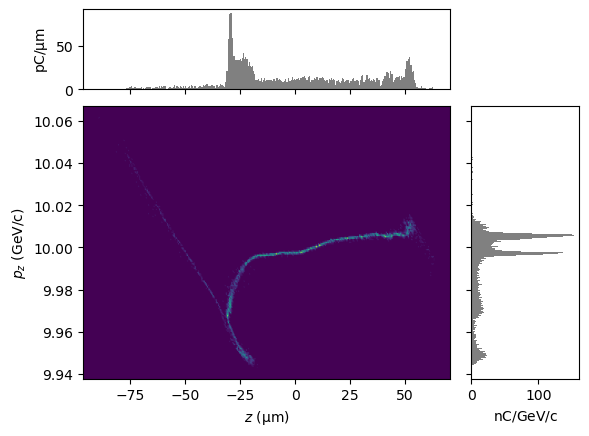

In [2]:
setLattice(tao, **importedDefaultSettings)

trackBeam(tao, 
          **importedDefaultSettings,
          verbose = True
         )

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

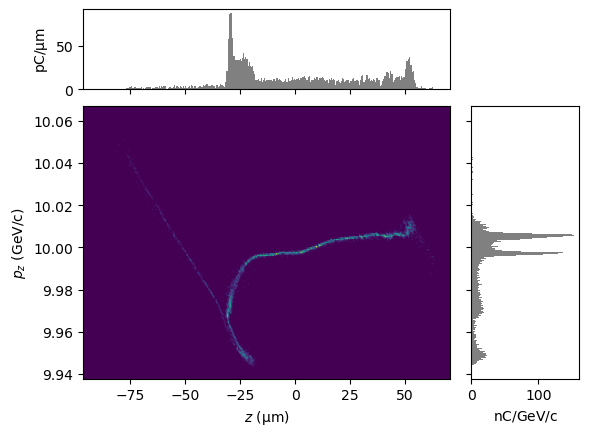

{'PDrive_median_x': -2.6189563851892177e-06,
 'PDrive_median_y': -2.2787174167506872e-07,
 'PDrive_median_xp': -3.7467924358468707e-07,
 'PDrive_median_yp': 2.705299572584512e-07,
 'PDrive_sigmaSI90_x': 4.590751075650862e-05,
 'PDrive_sigmaSI90_y': 1.0393987751264023e-05,
 'PDrive_sigmaSI90_z': 2.6086867218922735e-05,
 'PDrive_sigmaSI90_xp': 6.572427910417766e-05,
 'PDrive_sigmaSI90_yp': 1.5816156570191978e-05,
 'PDrive_emitSI90_x': 2.4335643851436274e-05,
 'PDrive_emitSI90_y': 2.8051827395712585e-06,
 'PDrive_norm_emit_x': 3.4331251042859434e-05,
 'PDrive_norm_emit_y': 4.733069649404344e-06,
 'PDrive_charge_nC': 1.599360000000001}

In [3]:
# Sanity check checkpoint load
PMFFF = getBeamAtElement(tao, "MFFF")

makeBeamActiveBeamFile(PMFFF)

trackBeam(tao, 
          trackStart = "MFFF",
          **importedDefaultSettings
         )

P = getBeamAtElement(tao, "PENT")
display(plotMod(P, 'z', 'pz', bins=300))
getBeamSpecs(P)

In [4]:
def getSpotRatio(verbose = False):      
        tao.cmd(f"set ele XTCAVF VOLTAGE = 0")
        trackBeam(tao, trackStart = "MFFF")
        P = getBeamAtElement(tao, "DTOTR")
        spotOFF = smallestIntervalImpliedSigma( P.x ) 

        if verbose:
            display(plotMod(P, 'x', 'y', bins=300))
            display(plotMod(P, 'z', 'x', bins=300))


        tao.cmd(f"set ele XTCAVF VOLTAGE = 10e6")
        trackBeam(tao, trackStart = "MFFF")
        P = getBeamAtElement(tao, "DTOTR") 
        spotON = smallestIntervalImpliedSigma( P.x ) 

        if verbose:
            display(plotMod(P, 'x', 'y', bins=300))
            display(plotMod(P, 'z', 'x', bins=300))

        return spotON / spotOFF

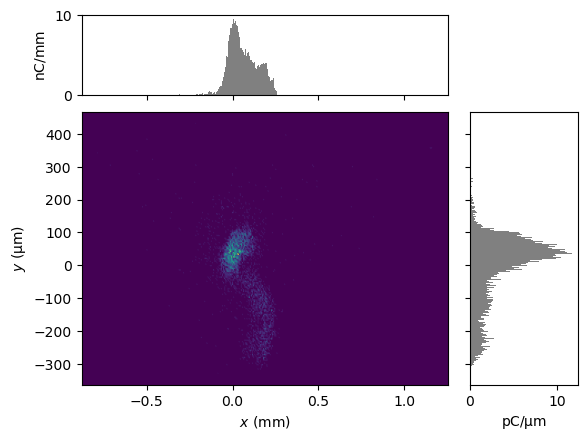

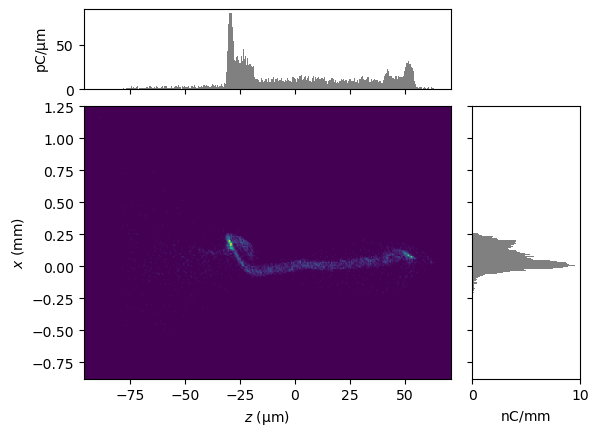

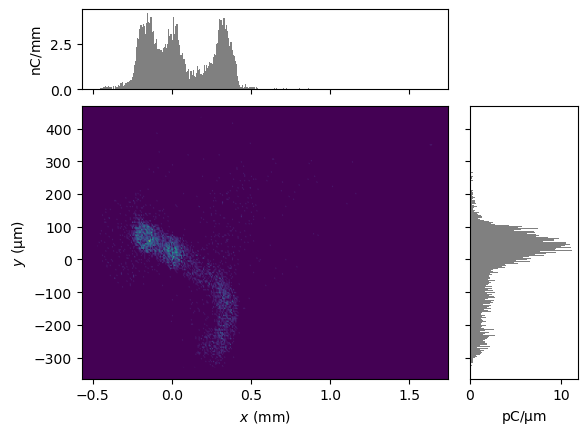

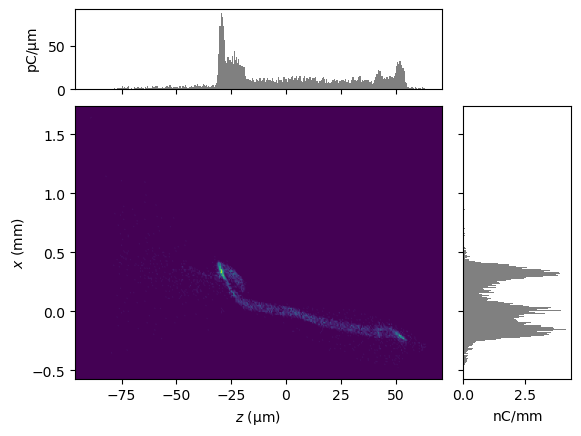

2.268721735906252

In [5]:
getSpotRatio( verbose = True )

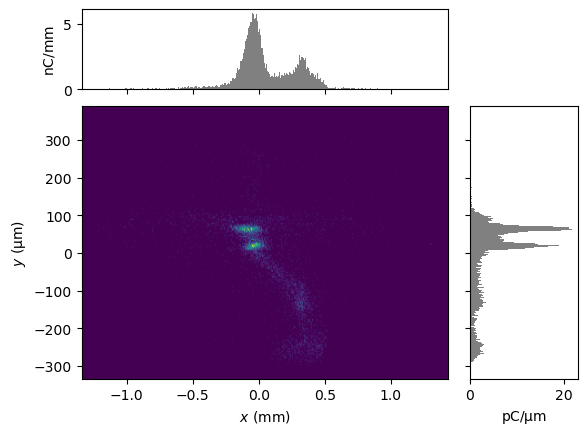

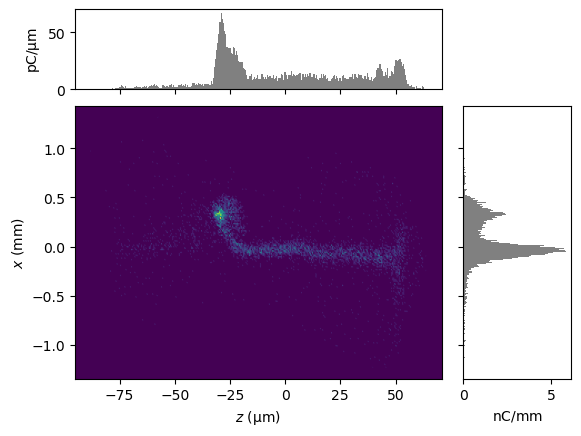

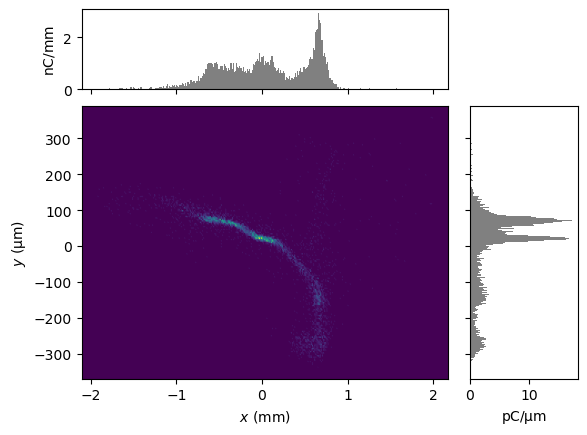

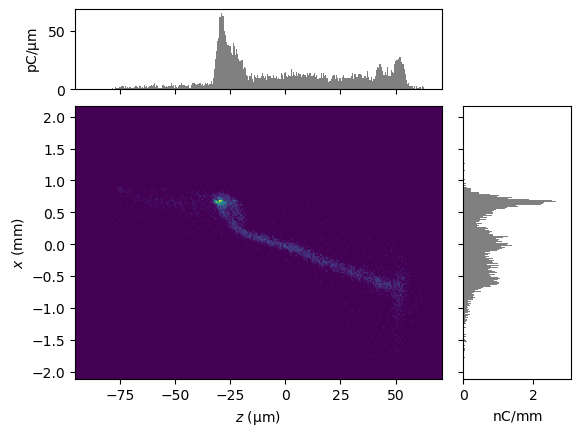

2.1651985093449797

In [6]:
#S20 configurator TCAV optics: https://docs.google.com/presentation/d/1pEDyfRYzVhJpeqzpDUfJOKxTxE6_achOUj4SHY-MoQQ/edit#slide=id.g2f39098462d_0_5

setQuadkG(tao, "Q5FF", -192)
setQuadkG(tao, "Q4FF", -162)
setQuadkG(tao, "Q3FF", 105)
setQuadkG(tao, "Q2FF", 120)
setQuadkG(tao, "Q1FF", -209)
setQuadkG(tao, "Q0FF", 120)
setQuadkG(tao, "Q0D", -139)
setQuadkG(tao, "Q1D", 225)
setQuadkG(tao, "Q2D", -139)


getSpotRatio( verbose = True )

## Optimize

In [7]:
setLattice(tao, **( importedDefaultSettings | {'Q5FFkG': -256.0,
 'Q4FFkG': -63.35151395673634,
 'Q3FFkG': 28.673391735215823,
 'Q2FFkG': 69.32732142540536,
 'Q1FFkG': -46.83693610728096,
 'Q0FFkG': 56.4818475159028,
 'Q0DkG': -1.549065504044325,
 'Q1DkG': 365.31251493793945,
 'Q2DkG': -220.90884713156686}) )

In [8]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

def objective(params, tao):
    Q5FFkG, Q4FFkG, Q3FFkG, Q2FFkG, Q1FFkG, Q0FFkG, Q0DkG, Q1DkG, Q2DkG  = params
    
    try:
        #Prevent recalculation until changes are made
        tao.cmd("set global lattice_calc_on = F")
        
        setQuadkG(tao, "Q5FF", Q5FFkG)
        setQuadkG(tao, "Q4FF", Q4FFkG)
        setQuadkG(tao, "Q3FF", Q3FFkG)
        setQuadkG(tao, "Q2FF", Q2FFkG)
        setQuadkG(tao, "Q1FF", Q1FFkG)
        setQuadkG(tao, "Q0FF", Q0FFkG)
        setQuadkG(tao, "Q0D", Q0DkG)
        setQuadkG(tao, "Q1D", Q1DkG)
        setQuadkG(tao, "Q2D", Q2DkG)

            
        #Reenable lattice calculations
        tao.cmd("set global lattice_calc_on = T")

        spotRatio = getSpotRatio()

        print(f"{spotRatio:.2f}: {params}")





    
    
    except: #If Bmad doesn't like the proposed solution, don't crash, give a bad number
        return 1e20


    
    return -1 * ( spotRatio ) 


def solver(
    tao,
    verbose = False
):


    quadNameList = ["Q5FF", "Q4FF", "Q3FF", "Q2FF", "Q1FF", "Q0FF", "Q0D", "Q1D", "Q2D"] 
    initialGuess = [getQuadkG(tao, name) for name in quadNameList]

    #For now, just hardcoding bounds... could generalize if required
    #From "bounds.yml" as of 2025-01-10-11-11-35
    # Q5FFkGBounds: (-256, 0)  #BCON = -70
    # Q4FFkGBounds: (-446, 0)  #BCON = -71
    # Q3FFkGBounds: (0, 457)   #BCON = 106
    # Q2FFkGBounds: (0, 167)   #BCON = 112
    # Q1FFkGBounds: (-257, 0)  #BCON = -225
    # Q0FFkGBounds: (0, 167)   #BCON = 112
    # Q0DkGBounds : (-239, 0)  #BCON = -112
    # Q1DkGBounds : (0, 386)   #BCON = 177
    # Q2DkGBounds : (-223, 0)  #BCON = -112

    bounds = [(-256,0), (-446,0), (0,457), (0,167), (-257,0), (0,167), (-239,0), (0,386), (-223,0)]


    # Perform optimization using Nelder-Mead
    result = minimize(
        objective, 
        initialGuess, 
        method='Nelder-Mead',
        #method='powell',
        bounds = bounds,
        args = (tao),
        options = {"maxiter" : 500}
    )

    # result = differential_evolution(
    #     objective, 
    #     bounds,
    #     args = (tao, ),#comma is required!
    #     maxiter = 50,
    #     popsize = 20,
    #     polish = False
    # )

    # #Apply best result to the lattice
    # betaSetX, alphaSetX, betaSetY, alphaSetY = result.x
    
    # #Prevent recalculation until changes are made
    # tao.cmd("set global lattice_calc_on = F")
    
    # tao.cmd(f"set element beginning beta_a = {betaSetX}")
    # tao.cmd(f"set element beginning alpha_a = {alphaSetX}")
    # tao.cmd(f"set element beginning beta_b = {betaSetY}")
    # tao.cmd(f"set element beginning alpha_b = {alphaSetY}")
    
    # #Reenable lattice calculations
    # tao.cmd("set global lattice_calc_on = T")

    if verbose:
        print("Optimization Results:")
        print(f"Optimal Parameters: {result.x}")
        print(f"Objective Function Value at Optimal Parameters: {result.fun}")
        print(f"Number of Iterations: {result.nit}")
        print(f"Converged: {result.success}")

    quadVariableNameList = ["Q5FFkG", "Q4FFkG", "Q3FFkG", "Q2FFkG", "Q1FFkG", "Q0FFkG", "Q0DkG", "Q1DkG", "Q2DkG"] 

    
    
    return { quadVariableNameList[i] : result.x[i] for i in range(len(quadVariableNameList)) }

sol = solver(tao, verbose = True)
sol

7.53: [-256.          -63.35151396   28.67339174   69.32732143  -46.83693611
   56.48184752   -1.5490655   365.31251494 -220.90884713]
7.53: [-256.          -63.35151396   28.67339174   69.32732143  -46.83693611
   56.48184752   -1.5490655   365.31251494 -220.90884713]
5.36: [-256.          -66.51908965   28.67339174   69.32732143  -46.83693611
   56.48184752   -1.5490655   365.31251494 -220.90884713]
4.78: [-256.          -63.35151396   30.10706132   69.32732143  -46.83693611
   56.48184752   -1.5490655   365.31251494 -220.90884713]
0.84: [-256.          -63.35151396   28.67339174   72.7936875   -46.83693611
   56.48184752   -1.5490655   365.31251494 -220.90884713]
1.52: [-256.          -63.35151396   28.67339174   69.32732143  -49.17878291
   56.48184752   -1.5490655   365.31251494 -220.90884713]
0.87: [-256.          -63.35151396   28.67339174   69.32732143  -46.83693611
   59.30593989   -1.5490655   365.31251494 -220.90884713]
7.52: [-256.          -63.35151396   28.67339174   69.3

{'Q5FFkG': -256.0,
 'Q4FFkG': -64.1006084288612,
 'Q3FFkG': 28.087110319671083,
 'Q2FFkG': 69.36901947676121,
 'Q1FFkG': -46.76868923764059,
 'Q0FFkG': 56.503225145800016,
 'Q0DkG': -1.5763871323780965,
 'Q1DkG': 366.87175209927284,
 'Q2DkG': -222.99951794631477}

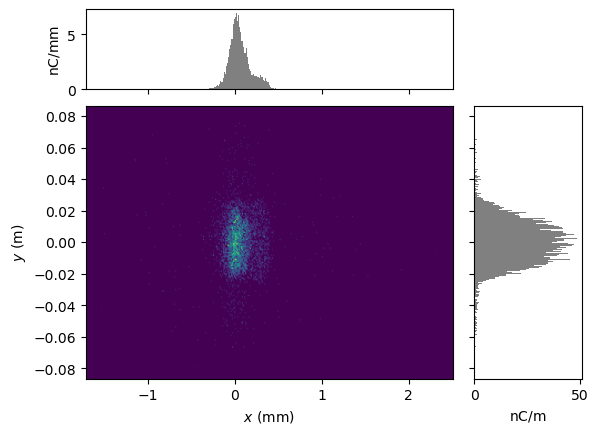

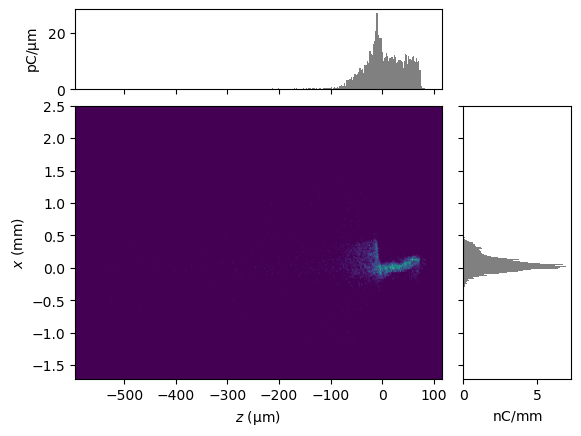

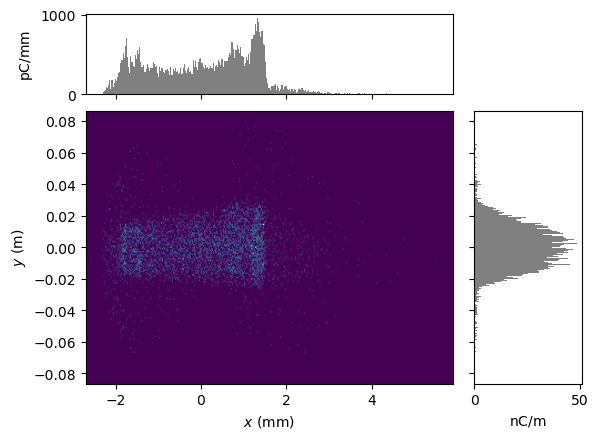

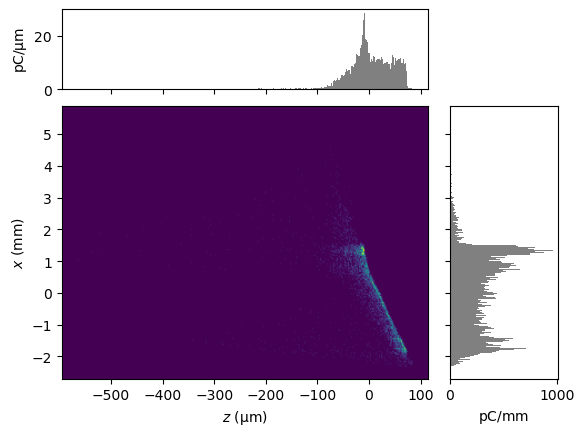

7.5770144198030565

In [9]:
setLattice(tao, **(importedDefaultSettings | sol ) ) 
getSpotRatio( verbose = True )